In [211]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt 


## in-hospital complication

In [212]:
df = pd.read_csv("Surgical-deepnet.csv")
df

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,18.79,14.1,1,0,1,0,0,0,0,0,...,-0.54,1,0,7.78,0,1,0,-0.16,1,1
14631,19.65,12.6,0,0,0,0,0,0,0,0,...,-1.42,4,0,8.40,6,1,0,-0.77,1,1
14632,14.84,12.6,1,0,0,0,0,0,0,0,...,0.65,0,0,13.25,3,3,0,0.99,1,1
14633,17.75,8.9,0,0,1,0,0,0,1,0,...,-0.50,0,1,8.30,5,0,0,0.17,1,1


In [213]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [214]:
# input features = 24 ta feature
X = df.drop("complication" , axis=1 ).copy().values
# target
Y = df["complication"].copy().values

In [215]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size= 0.2 )
X_test.shape , X_train.shape , Y_train.shape , Y_test.shape

((2927, 24), (11708, 24), (11708,), (2927,))

In [216]:
# number of features (x)== number of W's
# Activation Function Added
 
class Perceptron :
    def __init__(self , learning_rate , input_length , Activation_function):
        self.learning_rate = learning_rate
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)
        self.Activation_function = Activation_function

    def fit(self , X_train , Y_train  , X_test , Y_test , epochs):
        a=[]
        b=[]
        c=[]
        d=[]
        for epoch in tqdm(range(epochs)) :

            for x , y in zip(X_train , Y_train ): 
                y_pred = x @ self.weights + self.bias

                y_pred = self.activation_func(y_pred , self.Activation_function)
                # forwarding finished

                # START BACKPROPAGATION 
                error = y - y_pred
                
                # 2- updating weights and bias 
                self.weights = self.weights + (self.learning_rate * error * x)
                self.bias = self.bias + ( self.learning_rate * error)


            train_loss , train_acc = model.evaluate(X_train , Y_train)   
            test_loss , test_acc = model.evaluate(X_test , Y_test)
            a.append(train_loss)
            b.append(train_acc)
            c.append(test_loss)
            d.append(test_acc)

        return a,b,c,d


    def activation_func(self, x , function):
        if function == "sigmoid" :
            return 1 / (1 + np.exp(-x)) 
        
        elif function == "relu" :
            return np.maximum(0 , x)
        
        elif function == "tanh" :
            return np.tanh(x)
        
        elif function == "linear" :
            return x 
        
        elif function == "leaky-relu":
            return np.maximum(0.01* x , x)
        
        elif function == "gelu" :
            return 0.5 * x * (1 + np.tanh(np.sqrt(2) / (np.pi * (x + 0.044715 * 3))))
        
        else :
            raise Exception("unknown activation function")



    def predict(self , X_test):
        Y_pred = []
        for x_test in X_test :
            y_pred = x_test @ self.weights + self.bias 
            y_pred = self.activation_func(y_pred , self.Activation_function)
            Y_pred.append(y_pred)

        return np.array(Y_pred)


    def calc_loss(self, X_test , Y_test , metric):
        Y_pred = self.predict(X_test)
        if metric == "mse" :
            return np.mean(np.square(Y_test - Y_pred))
        elif metric == "mae" :
            return np.mean(np.abs(Y_test - Y_pred))
        elif metric == "rmse":
            return np.sqrt(np.mean(np.square( Y_test - Y_pred)))
        else :
            raise Exception("unknown metric")
        


    def calc_accuracy(self , X_test , Y_test):
        Y_pred = self.predict(X_test)
        Y_pred = Y_pred.reshape(-1)
        Y_pred = np.where(Y_pred > 0.5  , 1 ,  0)      
        accuracy = np.sum(Y_pred == Y_test) / len(Y_test)
        return accuracy


    def evaluate(self , X_test , Y_test):

        loss = self.calc_loss(X_test , Y_test , "mse")
        accuracy = self.calc_accuracy(X_test , Y_test)
        
        return loss , accuracy



        
model = Perceptron(learning_rate= 0.0001 , input_length= X_train.shape[1] , Activation_function="sigmoid")
a,b,c,d =model.fit(X_train , Y_train , X_test , Y_test , epochs=100)

# x * w + b  = y

# backpropagation = update w's and bias 
# error  = y - ypred

# methods : adam - rmsprob - SGD
# SGD = w = w + ( error * x * lr )
#    bias = b + ( error * lr )

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:02<00:00,  1.23s/it]


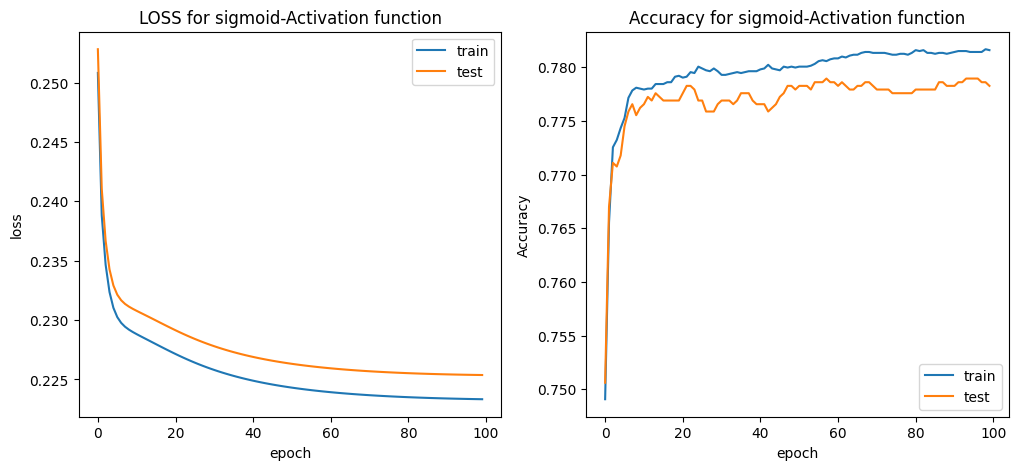

In [217]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))


ax1.plot(a)
ax1.plot(c)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text(f'LOSS for sigmoid-Activation function')

ax2.plot(b)
ax2.plot(d)
ax2.set_xlabel("epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Accuracy for sigmoid-Activation function')

plt.show()


In [218]:
model.evaluate(X_test , Y_test)

(0.2253719691376724, 0.7782712675093952)

In [219]:
Y_PRED = model.predict(X_test)
Y_PRED = Y_PRED.reshape(-1)
Y_PRED = np.where(Y_PRED > 0.5  , 1 ,  0)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test , Y_PRED)

# bimar / bimar    bimar / salem
# salem / bimar    salem / salem 

array([[2129,   45],
       [ 604,  149]], dtype=int64)

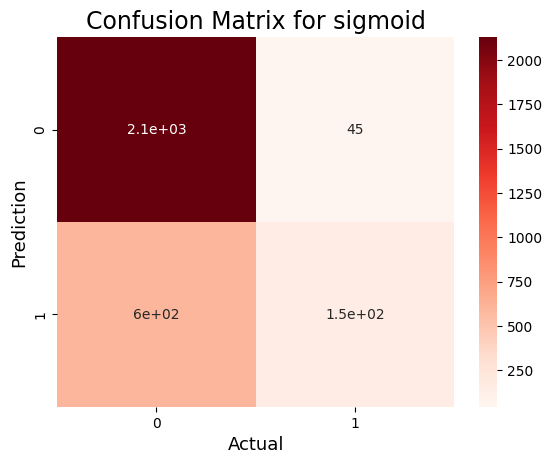

In [220]:
import seaborn as sns

matrix = confusion_matrix(Y_test , Y_PRED)
# Plot the confusion matrix.
sns.heatmap(matrix,annot=True , cmap=plt.cm.Reds )
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for sigmoid',fontsize=17)
plt.show()
  
